# Analyzing CIA Factbook Data Using SQLite and Python

Applying the fundamentals of SQL and Python to analyze the CIA Factbook Data

In [1]:
#importing sqlite3 and pandas modules
import sqlite3
import pandas as pd

#connecting to the factbook database
conn = sqlite3.connect("factbook.db")
#return a cursor class
cursor = conn.cursor()

In [2]:
#Selecting all tables from the database
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q2 = "SELECT * FROM facts limit 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

In [13]:
#querying the min/max population
pop_q = '''
SELECT MIN(population) min_pop, 
MAX(population) max_pop, 
MIN(population_growth) min_pop_growth, 
MAX(population_growth) max_pop_growth 
FROM facts;
'''
pd.read_sql_query(pop_q, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


## Exploring Outliers

In [22]:
#querying the country that has 0 population
out_q = '''
Select name, population 
FROM facts 
WHERE population = (SELECT MIN(population) FROM facts);
'''
pd.read_sql_query(out_q, conn)

,name,population
0,Antarctica,0


In [20]:
#querying the country that has over 7 billion people
out_q_2 = '''
SELECT name, population 
FROM facts 
WHERE population = (SELECT MAX(population) from facts)
'''
pd.read_sql_query(out_q_2, conn)

,name,population
0,World,7256490011


- The continent of Antarctica having 0 population makes sense. After a quick google search, there is no indegenous inhabitants, but there is a population of 1,100 - 4,400 researchers depending on the season.

- The population of the world in 2015 seems accurate

## Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5084b9e48>,
      dtype=object)

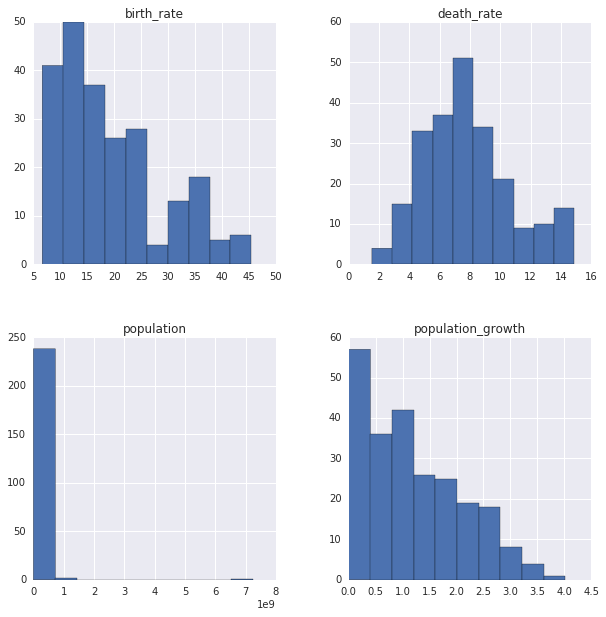

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#querying all rows, ignoring the min and max outliers
ignore_outlier_q = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MIN(population) from facts)
AND population != (SELECT MIN(population) from facts);
'''
pd.read_sql_query(ignore_outlier_q, conn).hist(ax=ax)

## Which countries have the highest population density?

In [34]:
#querying country and calculating population density
highest_pop_q = '''
SELECT name, cast(population as float)/cast(area as float) density
FROM facts
ORDER BY density DESC
LIMIT 20;
'''
pd.read_sql_query(highest_pop_q, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
